In [1]:
import os 
# Constants
# Folder for data - 1 above the current file 
# data_dir_path: str = os.path.join(os.path.abspath(__file__), "../data")
data_dir_path: str = "../data"

In [3]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn

# Load the model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set to evaluation mode


/home/antonk/Projects/cassini-8/CassiniHackathon.Data/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/antonk/Projects/cassini-8/CassiniHackathon.Data/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /home/antonk/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:05<00:00, 34.2MB/s] 


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [4]:
import cv2
from torchvision.transforms import functional as F

def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to tensor
    tensor_image = F.to_tensor(image)
    return image, tensor_image

image_name: str = "image-1.png"
image_path: str = os.path.join(data_dir_path, image_name)

image, tensor_image = preprocess_image(image_path)


In [5]:
# Perform detection
with torch.no_grad():
    predictions = model([tensor_image])


In [6]:
import numpy as np

# Extract masks and convert them to a binary format
masks = predictions[0]['masks'].cpu().numpy()  # [N, 1, H, W]
scores = predictions[0]['scores'].cpu().numpy()

# Filter masks with confidence threshold
threshold = 0.8
valid_masks = masks[scores > threshold]

# Combine masks into a single binary mask
boundary_mask = np.sum(valid_masks, axis=0)[0]
boundary_mask = (boundary_mask > 0).astype(np.uint8)


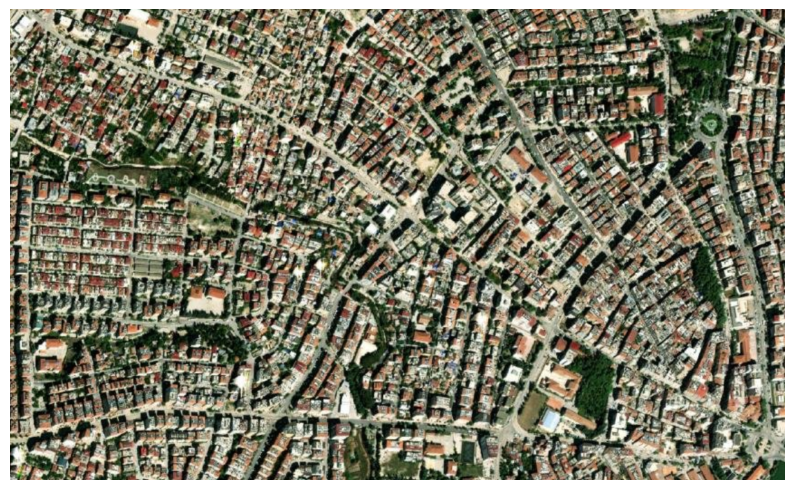

In [7]:
import matplotlib.pyplot as plt

# Overlay the boundary mask
overlay = image.copy()
overlay[boundary_mask == 1] = [255, 0, 0]  # Red boundary

# Display
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.axis('off')
plt.show()


NOT GOOD AT ALL